In [1]:
# https://drive.google.com/file/d/1fYNYdUpuU5820qSc81Dnu0TFRzGnNLkJ/view?usp=sharing
!gdown --id 1fYNYdUpuU5820qSc81Dnu0TFRzGnNLkJ

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fYNYdUpuU5820qSc81Dnu0TFRzGnNLkJ
To: /content/AAPL.csv
100% 267k/267k [00:00<00:00, 90.5MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split

RANDOM_SEED = 1
tf.random.set_seed(RANDOM_SEED)

In [3]:
df = pd.read_csv('AAPL.csv') # Đọc file .csv thành DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-25,4.963929,4.967500,4.628929,4.643214,3.957958,1554739200
1,2008-01-28,4.577143,4.757143,4.516071,4.643214,3.957958,1474844000
2,2008-01-29,4.683929,4.742500,4.608929,4.697857,4.004538,1099982800
3,2008-01-30,4.691786,4.837500,4.642857,4.720714,4.024021,1243051600
4,2008-01-31,4.623214,4.880357,4.621429,4.834286,4.120832,1345674400


In [4]:
corr = df.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999903,0.999878,0.999743,0.999634,-0.508744
High,0.999903,1.000000,0.999860,0.999879,0.999787,-0.507445
Low,0.999878,0.999860,1.000000,0.999884,0.999762,-0.510577
Close,0.999743,0.999879,0.999884,1.000000,0.999892,-0.509040
Adj Close,0.999634,0.999787,0.999762,0.999892,1.000000,-0.503427
Volume,-0.508744,-0.507445,-0.510577,-0.509040,-0.503427,1.000000


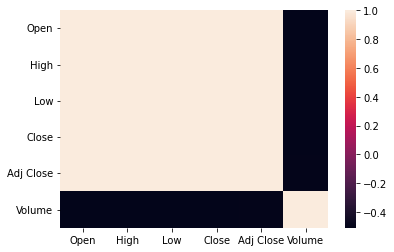

In [5]:
sns.heatmap(corr)

Tương quang của các thuộc tính là cao vì các cột trong dataset có liên quan chặt chẽ với nhau. Tuy nhiên biến dự báo dùng để huấn luyện model chỉ là các giá trị Adj Close trước đây. Thêm vào đó, mỗi cột dữ liệu là một biến dự báo riêng biệt.

In [6]:
import plotly.express as px
fig = px.line(df,x=df['Date'],y=df['Adj Close'])
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",width=1500, height=700)
fig

In [7]:
fig = px.line(df,x=df['Date'],y=['Adj Close','Open','Close','High','Low'])
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",width=1500, height=700)
fig

In [8]:
fig = px.line(df,x=df['Date'],y=df['Volume'])
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",width=1500, height=700)
fig

In [9]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Adj Close'])
data

,Adj Close
0,3.957958
1,3.957958
2,4.004538
3,4.024021
4,4.120832
...,...
3771,135.210007
3772,135.270004
3773,137.869995
3774,141.110001


In [10]:
# Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[  3.957958],
       [  3.957958],
       [  4.004538],
       ...,
       [137.869995],
       [141.110001],
       [142.529999]])

In [11]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()
# fit and transform in one step
scaled_data = scaler.fit_transform(dataset)

print ('scaled_data.shape',len(scaled_data))
scaled_data

scaled_data.shape 3776


array([[-0.844785  ],
       [-0.844785  ],
       [-0.84380133],
       ...,
       [ 1.98313193],
       [ 2.05155347],
       [ 2.08154059]])

In [13]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len)]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
window_size = 60

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)

x_train [array([-0.844785  , -0.844785  , -0.84380133, -0.8433899 , -0.84134547,
       -0.84238055, -0.84373063, -0.84520287, -0.84993457, -0.85042319,
       -0.84769728, -0.84514503, -0.84809587, -0.84517715, -0.84642436,
       -0.8482438 , -0.84981887, -0.84876452, -0.85023028, -0.85156754,
       -0.85138754, -0.85176683, -0.84931741, -0.84484926, -0.84799303,
       -0.85010816, -0.8482502 , -0.84833377, -0.8506225 , -0.84977387,
       -0.85141968, -0.84649509, -0.8473437 , -0.84611575, -0.84697081,
       -0.84689368, -0.84297846, -0.84500356, -0.84268913, -0.83866462,
       -0.8377324 , -0.83510938, -0.83820169, -0.83642732, -0.83611231,
       -0.83223562, -0.83354714, -0.83089836, -0.82995335, -0.82814681,
       -0.83010765, -0.83100771, -0.82900826, -0.83377217, -0.83336069,
       -0.83297495, -0.82955475, -0.82904687, -0.82483585, -0.82025841])]

y_train [-0.8253759102812768]

x_train [array([-0.844785  , -0.844785  , -0.84380133, -0.8433899 , -0.84134547,
       -0.84

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

def build_model():
    input = tf.keras.layers.Input(shape=(x_train.shape[1], 1), name ="input")
    x = tf.keras.layers.LSTM(128, 
                             return_sequences=True, 
                             kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED))(input)
    x = tf.keras.layers.LSTM(64, 
                             return_sequences=False, 
                             kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED))(x)
    x = tf.keras.layers.Dense(32, activation="relu", name ="dense_1")(x)
    output = tf.keras.layers.Dense(1, name="last_dense")(x)
    model = tf.keras.Model(inputs=input, outputs=output)
    return model


In [16]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 last_dense (Dense)          (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


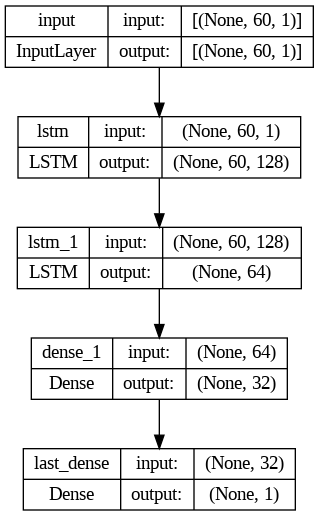

In [17]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [18]:
epochs = 50
batch_size = 64

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
56/56 [==============================] - 11s 19ms/step - loss: 0.0868
Epoch 2/50
56/56 [==============================] - 1s 16ms/step - loss: 0.0035
Epoch 3/50
56/56 [==============================] - 1s 19ms/step - loss: 0.0025
Epoch 4/50
56/56 [==============================] - 1s 18ms/step - loss: 0.0041
Epoch 5/50
56/56 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 6/50
56/56 [==============================] - 1s 19ms/step - loss: 0.0029
Epoch 7/50
56/56 [==============================] - 1s 18ms/step - loss: 0.0031
Epoch 8/50
56/56 [==============================] - 1s 16ms/step - loss: 0.0022
Epoch 9/50
56/56 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 10/50
56/56 [==============================] - 1s 20ms/step - loss: 0.0020
Epoch 11/50
56/56 [==============================] - 1s 17ms/step - loss: 0.0016
Epoch 12/50
56/56 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 13/50
56/56 [=================

In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - window_size: ]
print ('len(test_data):', len(test_data))

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

len(test_data): 248
6/6 [==============================] - 1s 5ms/step


In [24]:
def mae(y_true, y_pred):
    mae = np.mean(np.abs((y_true - y_pred)))

    return mae

def mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)

    return mse

def rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))

    return rmse

def mpe(y_true, y_pred):
    mpe = np.mean((y_true-y_pred) / y_true)

    return mpe
def mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true-y_pred)) / y_true)

    return mape

In [25]:
print(f'RMSE: {rmse(y_test, predictions)}')
print(f'MPE: {mpe(y_test, predictions)}')
print(f'MAPE: {mape(y_test, predictions)}')
print(f'MSE: {mse(y_test, predictions)}')
print(f'MAE: {mae(y_test, predictions)}')
from sklearn.metrics import r2_score
print(f'R2 Score: {r2_score(y_test, predictions)}')

RMSE: 3.623172212695394
MPE: 0.0021655393762477497
MAPE: 0.019897339127794504
MSE: 13.127376882848038
MAE: 2.924225866888816
R2 Score: 0.8891307878215655


In [22]:
import plotly.graph_objs as go

train = data[:training_data_len]
test = data[training_data_len:]
test['Date'] = range(len(test))
test['Predictions'] = predictions

fig = px.line(test, x='Date', y=['Adj Close', 'Predictions'], labels={'Adj Close':'Actual', 'Predictions':'Predictions'}, title='Actual vs. Predicted Adj Close Price')
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",width=1500, height=700)
fig.show()

<ipython-input-22-d07c21b21076>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-d07c21b21076>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation matrix as a heatmap using Plotly
fig = px.imshow(corr, color_continuous_scale='darkmint')

fig.show()